# Santander Customer Satisfaction
### Which customers are happy customers?

## Dataset from https://www.kaggle.com/c/santander-customer-satisfaction

You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.

The task is to predict the probability that each customer in the test set is an unsatisfied customer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
path='/Users/varun/Desktop/Varun/DataScience/Github/3_SantanderCustomerSatisfaction'
import os
os.chdir(path)
df_raw = pd.read_csv('train.csv')

In [3]:
df_raw.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
df_raw.shape

(76020, 371)

In [5]:
df_raw.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
# See all the column names
df_raw.columns.values

array(['ID', 'var3', 'var15', 'imp_ent_var16_ult1',
       'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3',
       'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3',
       'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
       'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
       'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3',
       'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0',
       'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5',
       'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0',
       'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0',
       'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14',
       'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18',
       'ind_var19', 'ind_var20_0', 'ind_var20', 'in

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


You can see 
the number of rows,  
number of columns and  
the number of float and int dtype variables

In [8]:
# Check the number of 0s and 1s in the TARGET variable.
df_raw['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Proportion of Happy and Unhappy Customers')

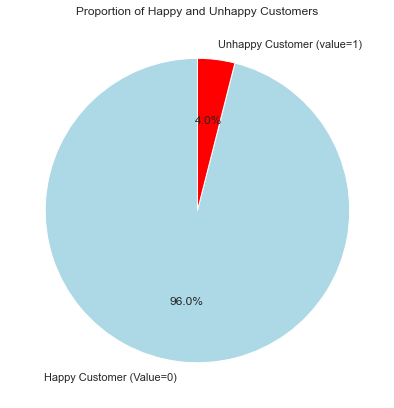

In [9]:
# Create a Pie Plot of the number of 0s and 1s in the TARGET variable
plt.figure(figsize=(7,7))
plt.pie(df_raw['TARGET'].value_counts(), labels = ['Happy Customer (Value=0)', 
                                                   'Unhappy Customer (value=1)'], autopct = '%.1f%%',
       colors = ["lightblue","red"], startangle=90)
plt.title('Proportion of Happy and Unhappy Customers')

### Here we are not splitting the data into Test-Train because we have a separate Test dataset

In [10]:
# Define the features and dependent variables for the Model
x_train = df_raw.drop(['ID', 'TARGET'], axis=1)
y_train = df_raw['TARGET']

In [11]:
# Check for Missing Data
df_raw.isnull().sum().sort_values(ascending=False)

TARGET                       0
num_op_var41_ult1            0
num_var26                    0
num_var25_0                  0
num_var25                    0
                            ..
imp_trasp_var33_out_hace3    0
imp_trasp_var33_out_ult1     0
imp_venta_var44_hace3        0
imp_venta_var44_ult1         0
ID                           0
Length: 371, dtype: int64

In [12]:
# import selection classes from Feature-engine

# conda install -c conda-forge feature_engine
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

We can see that there are no missing values

## Remove Constant  variables
Constant variables have the same value across all the observations in the dataset. 

https://feature-engine.readthedocs.io/en/latest/selection/DropConstantFeatures.html

In [13]:
# Create an object named constantvar. constantvar stands for 'constant variable' for which the value is constant.
# If tol=1, the transformer removes constant variables. Else, it will remove quasi-constant variables.
constantvar = DropConstantFeatures(tol=1)
constantvar.fit(x_train)

DropConstantFeatures(variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                'imp_op_var39_comer_ult1',
                                'imp_op_var39_comer_ult3',
                                'imp_op_var40_comer_ult1',
                                'imp_op_var40_comer_ult3',
                                'imp_op_var40_efect_ult1',
                                'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
                                'imp_op_var41_comer_ult1',
                                'imp_op_var41_comer_ult3',
                                'imp_op_var41_efect_ult1',
                                'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
                                'imp_op_var39_efect_ult1',
                                'imp_op_var39_efect_ult3', 'imp_op_var39_ult1',
                                'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1',
                                'ind_var2_0', 'ind_var2', 'ind_var5_0',
      

In [14]:
# the constant features can be found in the attribute features_to_drop_
# These are the features to be deleted
print('Number of Features to be dropped = ', len(constantvar.features_to_drop_))

# constantvar.features_to_drop_

Number of Features to be dropped =  34


Checking the values of the features to be deleted

In [15]:
col = pd.DataFrame()
col['Removed Variables'] = constantvar.features_to_drop_

# Checking Max value, Min value and Number of unique values.
# Initialise with Null Datatype
col['Max Value'] = None
col['Min Value'] = None
col['N_unique'] = None

In [16]:
# Checking the Max and Min values of the Columns to be deleted
for i in range(len(constantvar.features_to_drop_)):
    col['Max Value'][i] = df_raw[constantvar.features_to_drop_[i]].max()
    col['Min Value'][i] = df_raw[constantvar.features_to_drop_[i]].min()
    col['N_unique'][i] = df_raw[constantvar.features_to_drop_[i]].unique().size

col

,Removed Variables,Max Value,Min Value,N_unique
0,ind_var2_0,0,0,1
1,ind_var2,0,0,1
2,ind_var27_0,0,0,1
3,ind_var28_0,0,0,1
4,ind_var28,0,0,1
5,ind_var27,0,0,1
6,ind_var41,0,0,1
7,ind_var46_0,0,0,1
8,ind_var46,0,0,1
9,num_var27_0,0,0,1


In [17]:
print('Number of Input Variables to be removed = ', len(constantvar.features_to_drop_))
print('Number of Input Variables before removing constant features = ', x_train.shape[1])

# Remove constant features using transform method
x_train = constantvar.transform(x_train)
print('Number of Input Variables after removing constant features = ', x_train.shape[1])

# This is similar to using x_train.drop[Column_Names, axis=1].
# But the method DropConstantFeatures automatically deletes the columns without manually specifying the column names

Number of Input Variables to be removed =  34
Number of Input Variables before removing constant features =  369
Number of Input Variables after removing constant features =  335


## Remove Quasi-Constant  variables
Quasi-Constant variables have the same value in most of the observations in the dataset. 

In [18]:
# Specifying tol=0.998 will tell the transformer that we want to remove
# all features that show the same value in more than 99.8% of the
# observations in the dataset

# Note: quasi-constant variables also cover constant variables

quasi_constantvar = DropConstantFeatures(tol=0.998)

# find quasi-constant features in the train set
quasi_constantvar.fit(x_train)

DropConstantFeatures(tol=0.998,
                     variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                'imp_op_var39_comer_ult1',
                                'imp_op_var39_comer_ult3',
                                'imp_op_var40_comer_ult1',
                                'imp_op_var40_comer_ult3',
                                'imp_op_var40_efect_ult1',
                                'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
                                'imp_op_var41_comer_ult1',
                                'imp_op_var41_comer_ult3',
                                'imp_op_var41_efect_ult1',
                                'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
                                'imp_op_var39_efect_ult1',
                                'imp_op_var39_efect_ult3', 'imp_op_var39_ult1',
                                'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1',
                                'ind_var5_0', 

In [19]:
print('Number of Input Variables to be removed = ', len(quasi_constantvar.features_to_drop_))
# quasi_constantvar.features_to_drop_

Number of Input Variables to be removed =  143


In [20]:
col2 = pd.DataFrame()
col2['Removed Variables'] = quasi_constantvar.features_to_drop_

# Checking Max value, Min value and Number of unique values.
# Initialise with Null Datatype
col2['Max Value'] = None
col2['Min Value'] = None
col2['N_unique'] = None

In [21]:
# Checking the Max and Min values of the Columns to be deleted
for i in range(len(quasi_constantvar.features_to_drop_)):
    col2['Max Value'][i] = df_raw[quasi_constantvar.features_to_drop_[i]].max()
    col2['Min Value'][i] = df_raw[quasi_constantvar.features_to_drop_[i]].min()
    col2['N_unique'][i] = df_raw[quasi_constantvar.features_to_drop_[i]].unique().size

pd.options.display.max_rows = 150
pd.options.display.max_columns = 10
col2

,Removed Variables,Max Value,Min Value,N_unique
0,imp_op_var40_efect_ult1,6600,0,23
1,imp_op_var40_efect_ult3,6600,0,29
2,imp_sal_var16_ult1,105000,0,66
3,ind_var6_0,1,0,2
4,ind_var6,1,0,2
5,ind_var13_medio_0,1,0,2
6,ind_var13_medio,1,0,2
7,ind_var17_0,1,0,2
8,ind_var17,1,0,2
9,ind_var18_0,1,0,2


In [22]:
# 
x_train['imp_op_var40_efect_ult1'].value_counts()

0.00       75982
900.00         6
1800.00        4
600.00         3
60.00          3
270.00         2
120.00         2
450.00         2
300.00         2
74.28          1
1710.00        1
870.00         1
180.00         1
210.00         1
87.90          1
6600.00        1
150.00         1
930.00         1
750.00         1
1200.00        1
330.00         1
420.00         1
1020.00        1
Name: imp_op_var40_efect_ult1, dtype: int64

We can see that most of the values for the above variable are zeros.

In [23]:
print('Number of Input Variables to be removed = ', len(quasi_constantvar.features_to_drop_))
print('Number of Input Variables before removing constant features = ', x_train.shape[1])

# Remove constant features using transform method
x_train = quasi_constantvar.transform(x_train)
print('Number of Input Variables after removing constant features = ', x_train.shape[1])

Number of Input Variables to be removed =  143
Number of Input Variables before removing constant features =  335
Number of Input Variables after removing constant features =  192


## Remove Duplicates
Removes duplicated features and Observations in a dataframe.

https://feature-engine.readthedocs.io/en/latest/selection/DropDuplicateFeatures.html

In [24]:
duplicates = DropDuplicateFeatures()
duplicates.fit(x_train)

DropDuplicateFeatures(variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                 'imp_op_var39_comer_ult1',
                                 'imp_op_var39_comer_ult3',
                                 'imp_op_var40_comer_ult1',
                                 'imp_op_var40_comer_ult3', 'imp_op_var40_ult1',
                                 'imp_op_var41_comer_ult1',
                                 'imp_op_var41_comer_ult3',
                                 'imp_op_var41_efect_ult1',
                                 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
                                 'imp_op_var39_efect_ult1',
                                 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1',
                                 'ind_var1_0', 'ind_var1', 'ind_var5_0',
                                 'ind_var5', 'ind_var8_0', 'ind_var8',
                                 'ind_var12_0', 'ind_var12', 'ind_var13_0',
                                 'ind_var13_c

In [25]:
# The group of identical variables can be seen in the attribute duplicated_feature_sets

duplicates.duplicated_feature_sets_

[{'ind_var26', 'ind_var26_0'},
 {'ind_var25', 'ind_var25_0'},
 {'ind_var37', 'ind_var37_0'},
 {'ind_var39', 'ind_var40'},
 {'num_var26', 'num_var26_0'},
 {'num_var25', 'num_var25_0'},
 {'num_var37', 'num_var37_0'},
 {'num_var39', 'num_var40'}]

In [26]:
# Checking Manually if the identical variable groups are really same.

print( (df_raw['ind_var26'] == df_raw['ind_var26_0']).unique() )
print(  (df_raw['ind_var25'] == df_raw[ 'ind_var25_0']).unique() )
print(  (df_raw['ind_var37'] == df_raw[ 'ind_var37_0']).unique() )
print(  (df_raw['ind_var39'] == df_raw[ 'ind_var40']).unique() )
print(  (df_raw['num_var26'] == df_raw[ 'num_var26_0']).unique() )
print(  (df_raw['num_var25'] == df_raw[ 'num_var25_0']).unique() )
print(  (df_raw['num_var37'] == df_raw[ 'num_var37_0']).unique() )
print(  (df_raw['num_var39'] == df_raw[ 'num_var40']).unique() )

[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


In [27]:
# The attribute features_to_drop_ gives the variables that will be dropped (from the groups of duplicates)

# These features are deleted by the transformer (as we see in the next step)
# the transformer only leaves 1 variable per group and removes
# the rest.

duplicates.features_to_drop_

{'ind_var25',
 'ind_var26',
 'ind_var37',
 'ind_var39',
 'num_var25',
 'num_var26',
 'num_var37',
 'num_var39'}

In [28]:
# Remove duplicates using transform method. We could even do this Manually.

print('Number of Input Variables to be removed = ', len(duplicates.features_to_drop_))
print('Number of Input Variables before removing constant features = ', x_train.shape[1])

# Remove constant features using transform method
x_train = duplicates.transform(x_train)
print('Number of Input Variables after removing constant features = ', x_train.shape[1])

Number of Input Variables to be removed =  8
Number of Input Variables before removing constant features =  192
Number of Input Variables after removing constant features =  184


## Drop Correlated features

DropCorrelatedFeatures() finds and removes correlated features. 
Correlation is calculated with pandas.corr().

Features are removed on first found first removed basis, without any further insight.

DropCorrelatedFeatures() works only with numerical variables. Categorical variables will need to be encoded to numerical or will be excluded from the analysis.

https://feature-engine.readthedocs.io/en/latest/selection/DropCorrelatedFeatures.html

In [29]:
# The default option considers All Features, Pearson Correlation method and Correlation threshold = 0.8

correlated = DropCorrelatedFeatures(threshold = 0.85)

# Find correlated Features in the train set
correlated.fit(x_train)

DropCorrelatedFeatures(threshold=0.85,
                       variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                  'imp_op_var39_comer_ult1',
                                  'imp_op_var39_comer_ult3',
                                  'imp_op_var40_comer_ult1',
                                  'imp_op_var40_comer_ult3',
                                  'imp_op_var40_ult1',
                                  'imp_op_var41_comer_ult1',
                                  'imp_op_var41_comer_ult3',
                                  'imp_op_var41_efect_ult1',
                                  'imp_op_var41_efect_ult3',
                                  'imp_op_var41_ult1',
                                  'imp_op_var39_efect_ult1',
                                  'imp_op_var39_efect_ult3',
                                  'imp_op_var39_ult1', 'ind_var1_0', 'ind_var1',
                                  'ind_var5_0', 'ind_var5', 'ind_var8_0',
             

In [30]:
# The attribute correlated_feature_sets_ finds the Features that are correlated with each other
# Note that several variables can be correlated with each other.
# The groups of Correlated features are given within {}

correlated.correlated_feature_sets_

[{'imp_op_var39_comer_ult1',
  'imp_op_var39_comer_ult3',
  'imp_op_var41_comer_ult1',
  'imp_op_var41_comer_ult3'},
 {'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3'},
 {'imp_op_var40_ult1', 'saldo_var40'},
 {'imp_op_var39_efect_ult1',
  'imp_op_var39_ult1',
  'imp_op_var41_efect_ult1',
  'imp_op_var41_ult1'},
 {'imp_op_var39_efect_ult3', 'imp_op_var41_efect_ult3'},
 {'ind_var1_0', 'ind_var40_0', 'num_var1_0', 'num_var40_0'},
 {'ind_var1', 'ind_var40', 'num_var1', 'num_var40'},
 {'ind_var5_0', 'ind_var8_0', 'num_var5_0', 'num_var8_0'},
 {'ind_var5', 'num_meses_var5_ult3', 'num_var5'},
 {'ind_var8', 'num_meses_var8_ult3', 'num_var8'},
 {'ind_var12_0', 'num_var12_0'},
 {'ind_var12',
  'ind_var24',
  'ind_var24_0',
  'num_meses_var12_ult3',
  'num_var12',
  'num_var24',
  'num_var24_0'},
 {'ind_var13',
  'ind_var13_0',
  'ind_var13_corto',
  'ind_var13_corto_0',
  'num_meses_var13_corto_ult3',
  'num_var13',
  'num_var13_0',
  'num_var13_corto',
  'num_var13_corto_0'},
 {'ind_var13_

<AxesSubplot:>

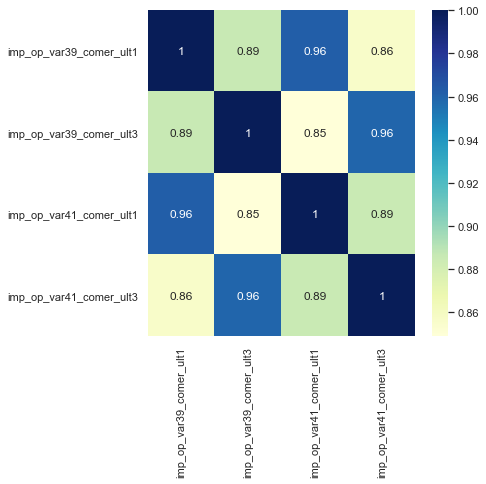

In [31]:
# Let's plot a correlation heat map for the first group from the above correlated set.

corr_heatmap = x_train[[
  'imp_op_var39_comer_ult1',
  'imp_op_var39_comer_ult3',
  'imp_op_var41_comer_ult1',
  'imp_op_var41_comer_ult3']]


plt.figure(figsize=(6,6))
sns.heatmap(corr_heatmap.corr(), cmap='YlGnBu', annot = True)

We can see that there is a good correlation between these variables

In [32]:
# The attribute features_to_drop_ stores all the features that will be dropped. 
# It selects 1 variable per group of correlated ones and drops the rest on a first come, first serve basis

correlated.features_to_drop_

{'delta_num_aport_var13_1y3',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var24_0',
 'ind_var25_0',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var31',
 'ind_var37_0',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var8_0',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_med_var22_ult3',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var5_ult3',
 'num_meses_var8_ult3',
 'num_op_var39_comer_ult1',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_op_var40_comer_ult3',
 'num_op_var40_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_comer_ult3',
 'num_op_var41_efect_ult3',


In [33]:
# Remove Correlated features using transform method. We could even do this Manually.

print('Number of Input Variables to be removed = ', len(correlated.features_to_drop_))
print('Number of Input Variables before removing constant features = ', x_train.shape[1])

# Remove constant features using transform method
x_train = correlated.transform(x_train)
print('Number of Input Variables after removing constant features = ', x_train.shape[1])

Number of Input Variables to be removed =  94
Number of Input Variables before removing constant features =  184
Number of Input Variables after removing constant features =  90


## Drop more correlated features using SmartCorrelatedSelection
SmartCorrelatedSelection() finds groups of correlated features and then selects, from each group, a feature following certain criteria:  
Feature with least missing values;  
Feature with most unique values;  
Feature with highest variance;  
Best performing feature according to estimator entered by user.

https://feature-engine.readthedocs.io/en/latest/selection/SmartCorrelatedSelection.html

In [34]:
from sklearn.ensemble import RandomForestClassifier

smart_corr = SmartCorrelatedSelection(
    variables=None, # evaluates all variables in the dataset
    method="pearson", # the default correlation method anyway
    threshold=0.80, # the correlation coefficient threshold. Default is 0.8
)

smart_corr.fit(x_train, y_train)

SmartCorrelatedSelection(variables=['var3', 'var15', 'imp_ent_var16_ult1',
                                    'imp_op_var39_comer_ult1',
                                    'imp_op_var40_comer_ult1',
                                    'imp_op_var40_ult1',
                                    'imp_op_var41_efect_ult1',
                                    'imp_op_var41_efect_ult3', 'ind_var1_0',
                                    'ind_var1', 'ind_var5_0', 'ind_var5',
                                    'ind_var8', 'ind_var12_0', 'ind_var12',
                                    'ind_var13_0', 'ind_var13_largo_0',
                                    'ind_var14_0', 'ind_var14', 'ind_var19',
                                    'ind_var20_0', 'ind_var25_cte',
                                    'ind_var30_0', 'ind_var30', 'ind_var31_0',
                                    'ind_var37_cte', 'ind_var39_0', 'num_var4',
                                    'num_var14_0', 'num_var26_0', ...])

In [35]:
# The attribute correlated_feature_sets_ finds the Features that are correlated with each other

smart_corr.correlated_feature_sets_

[{'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3'},
 {'ind_var5_0', 'ind_var8'},
 {'ind_var30', 'ind_var5'},
 {'ind_var12', 'ind_var12_0'},
 {'ind_var13_largo_0', 'num_meses_var13_largo_ult3'},
 {'ind_var25_cte', 'num_var26_0'},
 {'ind_var10_ult1', 'ind_var37_cte'},
 {'ind_var39_0', 'num_meses_var39_vig_ult3'},
 {'num_op_var39_comer_ult3', 'num_op_var41_ult1'},
 {'num_var30_0', 'num_var42_0'},
 {'saldo_medio_var5_ult1', 'saldo_var5'},
 {'delta_imp_aport_var13_1y3', 'num_aport_var13_ult1'}]

In [36]:
# Checking the correlation coefficient Manually between the 2 pandas series
df_raw['imp_op_var41_efect_ult1'].corr(df_raw['imp_op_var41_efect_ult3'])

0.8100844226234829

In [37]:
# Remove Correlated features using transform method. We could even do this Manually.

print('Number of Input Variables to be removed = ', len(smart_corr.features_to_drop_))
print('Number of Input Variables before removing constant features = ', x_train.shape[1])

# Remove constant features using transform method
x_train = smart_corr.transform(x_train)
print('Number of Input Variables after removing constant features = ', x_train.shape[1])

Number of Input Variables to be removed =  12
Number of Input Variables before removing constant features =  90
Number of Input Variables after removing constant features =  78


## Select features by Shuffling
Selects the important features based on it's effect on the ML performance  

The SelectByShuffling() first trains a machine learning model utilising all features. Next, it shuffles the values of 1 feature, obtains a prediction with the pre-trained model, and determines the performance drop (if any).  
If the drop in performance is bigger than a threshold then the feature is retained, otherwise removed. It continues until all features have been shuffled and the drop in performance evaluated.

https://feature-engine.readthedocs.io/en/latest/selection/SelectByShuffling.html

In [38]:
shuffle = SelectByShuffling()
shuffle.fit(x_train, y_train)
# This uses Random Forest Classifier and recursively drops each feature for analysis. Hence this is very slow.

SelectByShuffling(variables=['var3', 'var15', 'imp_ent_var16_ult1',
                             'imp_op_var39_comer_ult1',
                             'imp_op_var40_comer_ult1', 'imp_op_var40_ult1',
                             'imp_op_var41_efect_ult3', 'ind_var1_0',
                             'ind_var1', 'ind_var5', 'ind_var8', 'ind_var12',
                             'ind_var13_0', 'ind_var13_largo_0', 'ind_var14_0',
                             'ind_var14', 'ind_var19', 'ind_var20_0',
                             'ind_var25_cte', 'ind_var30_0', 'ind_var31_0',
                             'num_var4', 'num_var14_0', 'num_op_var40_ult1',
                             'num_op_var41_hace2', 'num_op_var41_hace3',
                             'num_op_var41_ult1', 'num_var31_0',
                             'num_var37_med_ult2', 'num_var42_0', ...])

In [39]:
#  The performace (roc-auc) of the model using all the features
shuffle.initial_model_performance_

0.7572528621613385

In [40]:
# The attribute performance_drifts_ gives the performance drift caused by shuffling each feature

shuffle.performance_drifts_

{'var3': -0.17382705215882777,
 'var15': -0.00206870359677247,
 'imp_ent_var16_ult1': -0.17379399128022155,
 'imp_op_var39_comer_ult1': -0.17310531416875474,
 'imp_op_var40_comer_ult1': -0.17462530788857633,
 'imp_op_var40_ult1': -0.17461787459795453,
 'imp_op_var41_efect_ult3': -0.1725728325389012,
 'ind_var1_0': -0.17466035932576385,
 'ind_var1': -0.17459822627457577,
 'ind_var5': -0.17600391958599304,
 'ind_var8': -0.17392827999303573,
 'ind_var12': -0.17348744753539658,
 'ind_var13_0': -0.17288461791091625,
 'ind_var13_largo_0': -0.17456270888124348,
 'ind_var14_0': -0.17456723791426365,
 'ind_var14': -0.17457187091469717,
 'ind_var19': -0.1746334810932728,
 'ind_var20_0': -0.17460709006574116,
 'ind_var25_cte': -0.17436249875718168,
 'ind_var30_0': -0.17441301477796167,
 'ind_var31_0': -0.17462050565651366,
 'num_var4': -0.17151752990090108,
 'num_var14_0': -0.17445044152904876,
 'num_op_var40_ult1': -0.1745763111580284,
 'num_op_var41_hace2': -0.17319734581962876,
 'num_op_var41_

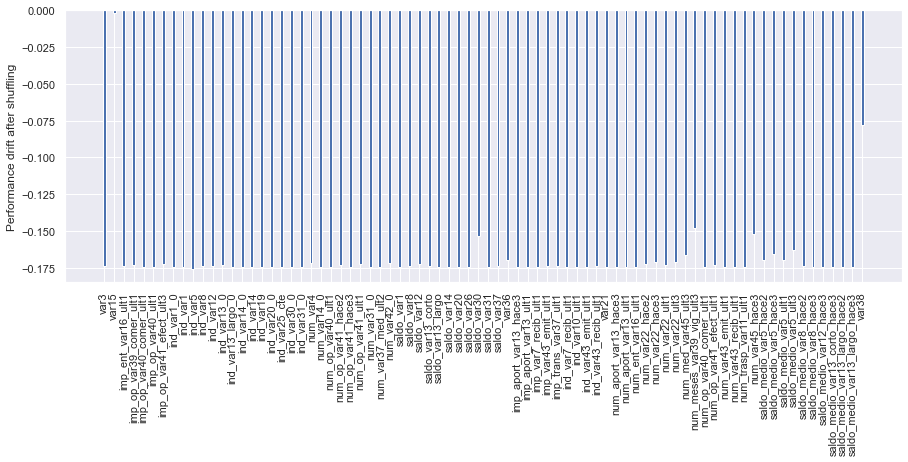

In [41]:
# Plotting the Performance Drifts

# shuffle.performance_drifts_ is a dictionary. So splitting the keys and values
x = list( shuffle.performance_drifts_.keys() )
y = list( shuffle.performance_drifts_.values() )

plt.figure(figsize = (15, 5))
plt.bar(x,y, width=0.3)
plt.ylabel('Performance drift after shuffling')
plt.xticks(rotation=90)
plt.show()

In [42]:
# The attribute features_to_drop_ gives the variables that will be dropped (from the groups of duplicates)

shuffle.features_to_drop_

['var3',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_ult1',
 'imp_op_var41_efect_ult3',
 'ind_var1_0',
 'ind_var1',
 'ind_var5',
 'ind_var8',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_largo_0',
 'ind_var14_0',
 'ind_var14',
 'ind_var19',
 'ind_var20_0',
 'ind_var25_cte',
 'ind_var30_0',
 'ind_var31_0',
 'num_var4',
 'num_var14_0',
 'num_op_var40_ult1',
 'num_op_var41_hace2',
 'num_op_var41_hace3',
 'num_op_var41_ult1',
 'num_var31_0',
 'num_var37_med_ult2',
 'num_var42_0',
 'saldo_var1',
 'saldo_var8',
 'saldo_var12',
 'saldo_var13_corto',
 'saldo_var13_largo',
 'saldo_var14',
 'saldo_var20',
 'saldo_var26',
 'saldo_var31',
 'saldo_var37',
 'var36',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_var7_recib_ult1',
 'imp_var43_emit_ult1',
 'imp_trans_var37_ult1',
 'ind_var7_recib_ult1',
 'ind_var10_ult1',
 'ind_var43_emit_ult1',
 'ind_var43_recib_ult1',
 'var21',
 'num_aport_var13_hace3',
 'num_aport_var13_ult1',
 'num_ent_var16

In [43]:
# Remove the insignificant features using transform method. We could even do this Manually.

print('Number of Input Variables to be removed = ', len(shuffle.features_to_drop_))
print('Number of Input Variables before removing constant features = ', x_train.shape[1])

# Remove constant features using transform method
x_train = shuffle.transform(x_train)
print('Number of Input Variables after removing constant features = ', x_train.shape[1])

Number of Input Variables to be removed =  70
Number of Input Variables before removing constant features =  78
Number of Input Variables after removing constant features =  8


## Select features by univariate model performance
This selection procedure builds 1 model per feature, and selects those features that return models with a performance above a certain threshold.

https://feature-engine.readthedocs.io/en/latest/selection/SelectBySingleFeaturePerformance.html

In [44]:
univariate = SelectBySingleFeaturePerformance()
# We have set the threshold to None. So the selector selects features whose
# performance is bigger than the mean performance of all features

univariate.fit(x_train, y_train)

SelectBySingleFeaturePerformance(variables=['var15', 'saldo_var30',
                                            'num_med_var45_ult3',
                                            'num_meses_var39_vig_ult3',
                                            'num_var45_hace3',
                                            'saldo_medio_var5_hace3',
                                            'saldo_medio_var5_ult3', 'var38'])

In [45]:
# the univariate performance of the features

univariate.feature_performance_

{'var15': 0.7013220134600737,
 'saldo_var30': 0.6735045708223096,
 'num_med_var45_ult3': 0.5304160535427601,
 'num_meses_var39_vig_ult3': 0.5554192142750627,
 'num_var45_hace3': 0.5276871839909396,
 'saldo_medio_var5_hace3': 0.6549404621644405,
 'saldo_medio_var5_ult3': 0.655017734414709,
 'var38': 0.5181389096074303}

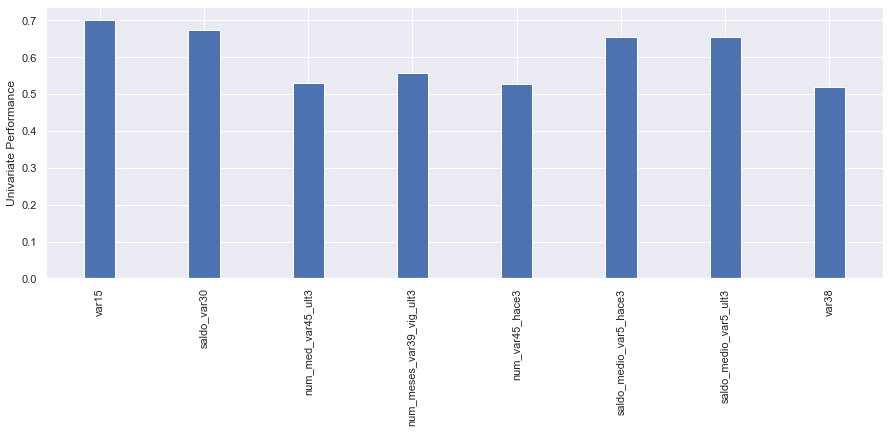

In [46]:
# Plotting the Univariate Performance

# univariate.feature_performance_ is a dictionary. So splitting the keys and values
x = list( univariate.feature_performance_.keys() )
y = list( univariate.feature_performance_.values() )

plt.figure(figsize = (15, 5))
plt.bar(x,y, width=0.3)
plt.ylabel('Univariate Performance')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Remove the insignificant features using transform method. We could even do this Manually.

print('Number of Input Variables to be removed = ', len(univariate.features_to_drop_))
print('Number of Input Variables before removing constant features = ', x_train.shape[1])

# Remove constant features using transform method
x_train = univariate.transform(x_train)
print('Number of Input Variables after removing constant features = ', x_train.shape[1])

Number of Input Variables to be removed =  4
Number of Input Variables before removing constant features =  8
Number of Input Variables after removing constant features =  4


## Select features Recursively
RecursiveFeatureElimination selects features following a recursive process.

The process is as follows:

1. Train an estimator using all the features.
2. Rank the features according to their importance, derived from the estimator.
3. Remove one feature -the least important- and fit a new estimator with the remaining features.
4. Calculate the performance of the new estimator.
5. Calculate the difference in performance between the new and the original estimator.
6. If the performance drops beyond the threshold, then that feature is important and will be kept. Otherwise, that feature is removed.

Repeat steps 3-6 until all features have been evaluated.

https://feature-engine.readthedocs.io/en/latest/selection/RecursiveFeatureElimination.html

In [48]:
recursive = RecursiveFeatureElimination()

recursive.fit(x_train, y_train)

RecursiveFeatureElimination(variables=['var15', 'saldo_var30',
                                       'saldo_medio_var5_hace3',
                                       'saldo_medio_var5_ult3'])

In [49]:
# The feature importance derived from the first model, trained using all the features

recursive.feature_importances_

saldo_medio_var5_hace3    0.191867
var15                     0.257626
saldo_medio_var5_ult3     0.264154
saldo_var30               0.286353
dtype: float64

In [50]:
# The performance of the model trained on all features

recursive.initial_model_performance_

0.7665934185973216

In [51]:
# The drop in performance caused when removing each feature

recursive.performance_drifts_

{'saldo_medio_var5_hace3': 0.011167228997414402,
 'var15': 0.07772987065684978,
 'saldo_medio_var5_ult3': 0.013654150399815879,
 'saldo_var30': 0.02715733644325502}

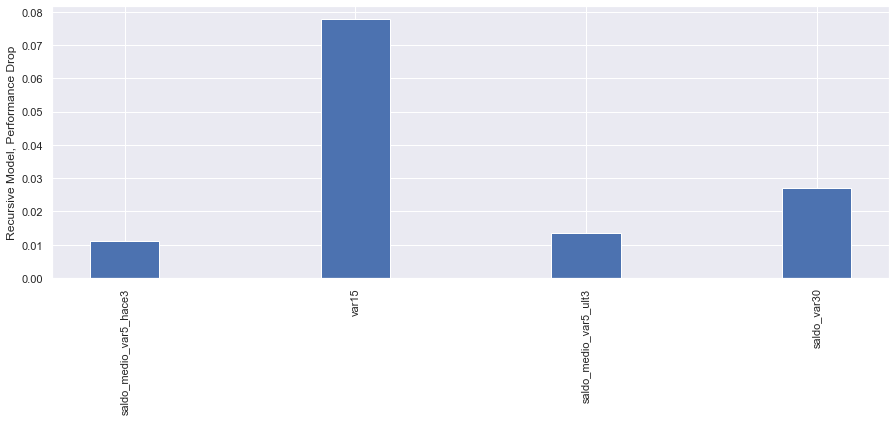

In [52]:
# Plotting the Drop in Performance from Recursive Feature Elimination Model

# recursive.performance_drifts_ is a dictionary. So splitting the keys and values
x = list( recursive.performance_drifts_.keys() )
y = list( recursive.performance_drifts_.values() )

plt.figure(figsize = (15, 5))
plt.bar(x,y, width=0.3)
plt.ylabel('Recursive Model, Performance Drop')
plt.xticks(rotation=90)
plt.show()

In [53]:
# Remove the insignificant features using transform method. We could even do this Manually.

print('Number of Input Variables to be removed = ', len(recursive.features_to_drop_))
print('Number of Input Variables before removing constant features = ', x_train.shape[1])

# Remove constant features using transform method
x_train = recursive.transform(x_train)
print('Number of Input Variables after removing constant features = ', x_train.shape[1])

Number of Input Variables to be removed =  0
Number of Input Variables before removing constant features =  4
Number of Input Variables after removing constant features =  4


In [54]:
x_train

,var15,saldo_var30,saldo_medio_var5_hace3,saldo_medio_var5_ult3
0,23,0.00,0.00,0.00
1,34,300.00,88.89,0.00
2,23,3.00,0.18,2.07
3,37,70.62,0.00,138.84
4,39,135003.00,0.30,13501.47
...,...,...,...,...
76015,48,0.00,0.00,0.00
76016,39,48191.22,0.00,0.00
76017,23,3.00,0.00,3.00
76018,25,3.00,1.74,2.58


In [55]:
# Number of Unique Values
x_train['var15'].unique()

array([ 23,  34,  37,  39,  27,  26,  45,  25,  42,  51,  43,  33,  30,
        44,  36,  55,  28,  35,  54,  40,  24,  14,  66,  50,  22,  62,
        60,  64,  76,  31,  38,  41,  56,  72,  68,   5,  77,  29,  63,
        32,  57,  80,  52,  61,  71,  88,  59,  53, 100,  74,  86,  73,
        48,  46,  49,  65,  47,  21,  75,  58,  67,  13,  83,  87,  84,
        70,  78,  85,  17,  94,  79,  89,  81,  15,  69,  11,  90, 102,
        91,  10,  92,  82,  18,  12,  19,   7,  93,   9,  96,   6,   8,
        16,  95,  97,  98,  20,  99, 105, 104, 101])

In [68]:
# Number of Unique Values
len( x_train['var15'].value_counts() )

100

In [69]:
len( x_train['saldo_var30'].value_counts() )

16940

In [70]:
len( x_train['saldo_medio_var5_hace3'].value_counts() )

7787

In [71]:
# Number of Unique Values
len( x_train['saldo_medio_var5_ult3'].value_counts() )

17330

# Fit a Logistic Regression Model

In [72]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [59]:
print('Train Data Accuracy Score:', accuracy_score(y_train, logistic_reg.predict(x_train)))

Train Data Accuracy Score: 0.9604314654038411


# Fit a KNN Classifier Model

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # The default 'k' value in sklearn.neighbors.KNeighborsClassifier is 5.
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
print('Train Data Accuracy Score:', accuracy_score(y_train, knn.predict(x_train)))

Train Data Accuracy Score: 0.9593528018942383


# Test the Models on Testdata

In [85]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,...,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,...,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,...,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,...,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,...,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,...,0.0,0.0,0.0,0.0,73649.73


In [74]:
x_test = df_test[['var15', 'saldo_var30',  'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3']]
x_test.head()

,var15,saldo_var30,saldo_medio_var5_hace3,saldo_medio_var5_ult3
0,32,6.0,2.43,4.80
1,35,3.0,2.55,2.85
2,23,30.0,57.00,66.15
3,24,0.0,0.00,0.00
4,23,30.0,3.87,21.30


### Logistic Regression Model : Find model accuracy and Predict the Target outcome

In [75]:
y_hat_test = logistic_reg.predict(x_test)
y_hat_test

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
print('Test Data Accuracy Score:', accuracy_score(y_hat_test, logistic_reg.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_hat_test, logistic_reg.predict(x_test)))
print('')

print('f1_score', f1_score(y_hat_test, logistic_reg.predict(x_test)))

Test Data Accuracy Score: 1.0

Confusion Matrix:
[[75818]]

f1_score 0.0


In [77]:
np.unique(y_hat_test)

array([0])

In [78]:
pd.DataFrame(y_hat_test).value_counts()

0    75818
dtype: int64

### KNN Classifier Model : Find model accuracy and Predict the Target outcome

In [79]:
y_hat_test = knn.predict(x_test)
y_hat_test

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
print('Test Data Accuracy Score:', accuracy_score(y_hat_test, knn.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_hat_test, knn.predict(x_test)))
print('')

print('f1_score', f1_score(y_hat_test, knn.predict(x_test)))

Test Data Accuracy Score: 1.0

Confusion Matrix:
[[75594     0]
 [    0   224]]

f1_score 1.0


In [81]:
np.unique(y_hat_test)

array([0, 1])

In [82]:
pd.DataFrame(y_hat_test).value_counts()

0    75594
1      224
dtype: int64

### Summary
We have Selected the Features using several methods.  
Two classification models have been used, both of them give good accuracy of ~96% on Train data and  100% on Test data.